In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
print(os.listdir("C:/Users/kadambini.indurkar/Documents/R_Sab_Isme/MMM"))


['.ipynb_checkpoints', 'Advertising.csv', 'Python_MMM_advertising_csv.ipynb', 'Python_MMM_advertising_csv1.ipynb', 'UpGrad-Projects-master', 'UpGrad-Projects-master.zip']


In [3]:
#Market Mix Modeling
#Sales Data 
#To understand how much each marketing input contributes to sales, and how much to spend on each marketing input.

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#remove extra 'Unnamed' column
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#Data Description 
df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


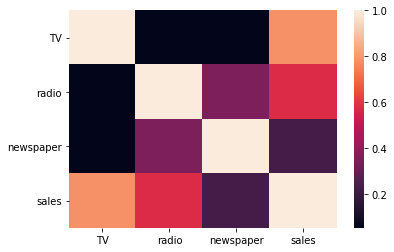

In [6]:
#Correlation b/w variables
corr = df_clean.corr()
sns.heatmap(corr)

In [7]:
#Labels and features
labels = df_clean['sales']
features = df_clean.drop(['sales'], axis=1)

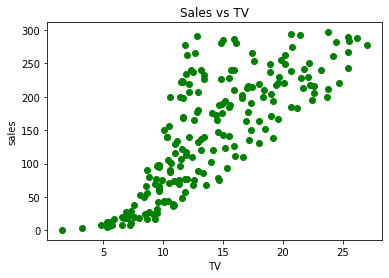

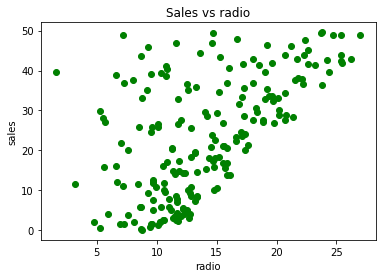

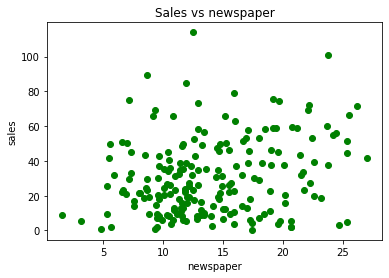

In [8]:
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'go')  # arguments are passed to np.histogram
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

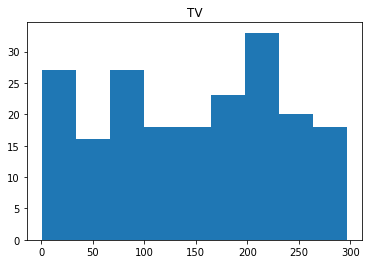

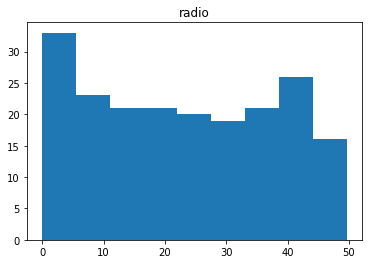

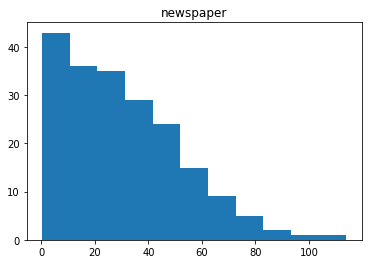

In [9]:
#Data Distribultion 
for x in features:
    plt.hist(features[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

C:\Users\kadambini.indurkar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


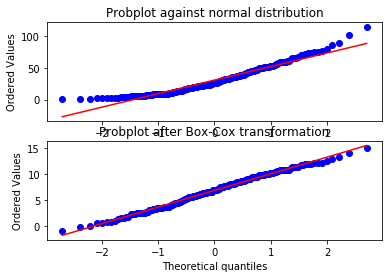

In [10]:
#As from the above histogram graph, the data distribution for the newspaper is skew towards left.
#Lets correct it using Box Cox which helps in removing the data skewness.

from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df_clean['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)
df_clean['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df_clean['newspaper'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

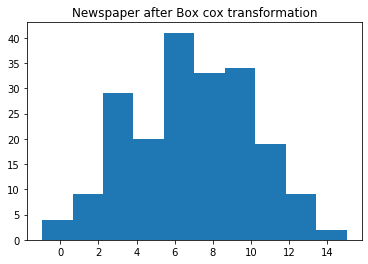

In [11]:
plt.hist(df_clean['newspaper'], bins='auto')  # arguments are passed to np.histogram
plt.title("Newspaper after Box cox transformation")
plt.show()

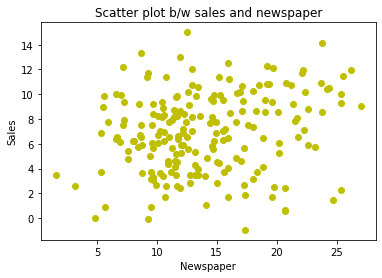

In [12]:
plt.plot(df_clean['sales'], df_clean['newspaper'], 'yo')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [13]:
# As from the above graph it is clear that newspaper do not have any relationship with the Sales.
# Lets build 2 algorithm with and without newspaper to get more clear picture.
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()

#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        10:39:05   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8894      0.361      7.995      0.0

In [19]:
model4 = sm.ols(formula="sales~newspaper", data=df_clean).fit()
model5 = sm.ols(formula="sales~radio", data=df_clean).fit()
model6 = sm.ols(formula="sales~TV+newspaper", data=df_clean).fit()
model7 = sm.ols(formula="sales~radio+newspaper", data=df_clean).fit()

#
print(model4.summary())
print(model5.summary())
print(model6.summary())
print(model7.summary())





#AIC BIC
#They are used to compare a number of models and the model with lowest values of AIC and BIC is 
#considered to be the best (however AIC and BIC are accompanied often by other tests of fit, 
#e.g. RMSEA, CFI, TLI etc. and the decision which model is the best is not based on AIC and BIC only
#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     570.3
#Prob (F-statistic):           1.58e-96
#Log-Likelihood:                -386.18
#AIC:                             780.4
#BIC:                             793.6

#Model2
#model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
#R-squared:                       0.897
#Adj. R-squared:                  0.896
#F-statistic:                     859.6
#Prob (F-statistic):           4.83e-98
#Log-Likelihood:                -386.20
#AIC:                             778.4
#BIC:                             788.3
    
#Model3
#model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#R-squared:                       0.612
#Adj. R-squared:                  0.610
#F-statistic:                     312.1
#Prob (F-statistic):           1.47e-42
#Log-Likelihood:                -519.05
#AIC:                             1042.
#BIC:                             1049.

#From the above results it is clear that the 'model 2' with feature 'radio' and 'TV' is having the lowest
#AIC & BIC



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.108
Date:                Mon, 26 Aug 2019   Prob (F-statistic):            0.00487
Time:                        19:43:53   Log-Likelihood:                -609.68
No. Observations:                 200   AIC:                             1223.
Df Residuals:                     198   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7655      0.872     13.499      0.0

In [15]:
#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)


Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
R2:  0.8971942610828956
Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64


In [16]:
#Actual and predicted values
y_pred = model2.predict()
df1 = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})  
df1.head(10)

,Actual,Predicted
0,22.1,20.555465
1,10.4,12.345362
2,9.3,12.337018
3,18.5,17.617116
4,12.9,13.223908
5,7.2,12.512084
6,11.8,11.718212
7,13.2,12.105516
8,4.8,3.709379
9,10.6,12.551697


In [17]:
#Final observation

#Values from Model 1 -> sales~TV+radio+newspaper

#==============================================================================
#                 coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#Intercept      2.8894      0.361      7.995      0.000       2.177       3.602
#TV             0.0457      0.001     32.810      0.000       0.043       0.048
#radio          0.1876      0.008     22.190      0.000       0.171       0.204
#newspaper      0.0060      0.040      0.152      0.879      -0.072       0.084
#==============================================================================

#newspaper Values
#Coef   : 0.0060
#t-test : 0.152
#p-value: 0.860

#From the above values it is clear that newspaper maketing is not affecting sales by any chance.
#High Pvalue(>0.005) is always fail to reject null hypothesis.
#That means there is no relationship between the newspaper marketing and sales.
